# Overfitting and Underfitting

Reference: [Kaggle](https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting/tutorial)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

import tensorflow as tf

- we'll examine at the learning curves for evidence of underfitting and overfitting and look at a couple of strategies for correcting it.

## Interpreting Learning Curves

- we have two kinds of information in *training data*: **signal** and **noise**.
    - ***signal***: part that generalizes, help your model to make predictions from new data
    - ***noise***: part that is *only* true for training data
- we train a model by choosing weights or parameters that minimize the loss on a training set
- **leaning curves** are the plots of loss on the training and on the validation set, epoch by epoch.
- the training loss will go down when the mode learns signal or when it learns noise
- we have to mkae a trade: we can get the model to learn more signal at the cost of learning more noise. 
    - as long as the trade is in our favor, the validation loss will continue to decrease
- this trade-off indicates that there can be two problems that occur when training model: **not enough signal** or **too much noise**.
    - **Underfitting** the training set is when the loss is not as low as it could be because the model hasn't learned enough *signal*
    - **Overfitting** the training set is when the loss is not as low as it could be because the model learned too much *noise*

## Capcity

- refers to the *size* and *complexity* of the patterns it is able to learn
    - in NN, this will largely be determined by how manyneurons it has and how they are connected together
    - if the network is underfitting, you should ttry increasing its capacity
- to increase the capacity of a network you can either make it *wider* (more unis to existing layers) or make it *deeper* (adding more layers)
    - wider networks have an easier time learning more linear relationships
    - deeper networks prefer more nonlinear ones

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [38]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(50, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1),
])

In [39]:
model.compile(optimizer='adam', loss='mae')

wider.compile(optimizer='adam', loss='mae')

deeper.compile(optimizer='adam', loss='mae')

In [40]:
history_model = model.fit(
    X, y,
    batch_size=256,
    epochs=200,
)

history_wider = model.fit(
    X, y,
    batch_size=256,
    epochs=200,
)

history_deeper = model.fit(
    X, y,
    batch_size=256,
    epochs=200,
)

Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 3.6742
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 3.4665
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 3.2663
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 3.0686
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 2.8473
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6639
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4707
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 2.2722
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 2.1067
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 1.9019
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7308
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5232
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 2ms/step - loss: 0.0428
Epoch 105/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0420
Epoch 106/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 107/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 108/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0413
Epoch 109/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0424
Epoch 110/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0409
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0400
Epoch 112/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 114/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 115/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 116/200
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 12/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 13/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 14/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 15/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 16/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 17/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 18/200
5/5 [==============================] - 0s 2ms/step - lo

5/5 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 110/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 111/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 113/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 114/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 115/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 116/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 120/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 121/200
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 13/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 14/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 15/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 16/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 17/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 18/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 19/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 20/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 21/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 22/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 23/200
5/5 [==============================] - 0s 2ms/step -

5/5 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 115/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0212
Epoch 116/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 117/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 118/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 119/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 120/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 121/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 122/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 123/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 124/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 125/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 126/200
5/5 [==============================] - 0

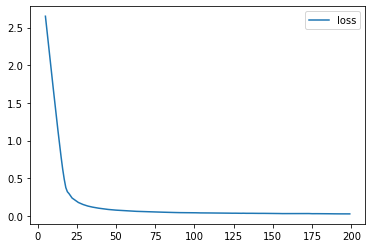

In [41]:
history_df = pd.DataFrame(history_model.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

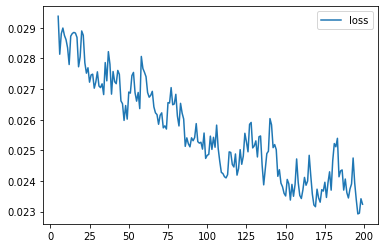

In [42]:
history_df = pd.DataFrame(history_wider.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

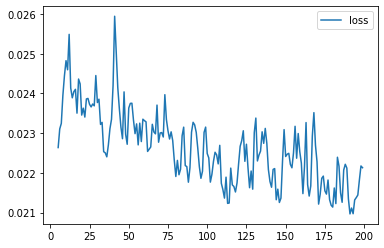

In [43]:
history_df = pd.DataFrame(history_deeper.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();